# Python for Engineers Assignment 2018
Refer to file Assignment.ipynb

Submission deadline 07/16 (July 16).
<br>提出締め切り07/16 (7月16日）。

Please submit your answer by email.
<br>どうぞ、メールによってあなたの答えを提出してください。
<br>philamore.hemma.5s@kyoto-u.ac.jp

You may use the following file formats:
<br>あなたは以下のファイル形式を使ってもよい:
- .py
- .ipynb
- .txt

You may use multiple files.
<br>あなたは複数のファイルを使ってもよい。

### Rescheduled Class
You should all have received an email concerning the 2 rescheduled class.
<br>Rescheduled classes will be held on: 
- 06/26 (June 26, Tuesday ), period 1, room CALL 23 
- 06/29 (June 29, Friday ), period 5, room CALL 23 

You may attend either class. 

These classes are for you to ask questions and get help with your assignment. 

There will be *no new taught material* in these classes.

__THERE IS A CLASS ON JUNE 26, TUESDAY, PERIOD 5 AS USUAL__

## Please download the new class notes.
### Step 1 : Navigate to the directory where your files are stored.  
Open a terminal. 
<br>Using `cd`, navigate to *inside* the ILAS_Python_for_engineers folder on your computer. 
### Step 3 : Update the course notes by downloading the changes
In the terminal type:

>`git add -A
git commit -m "commit"
git fetch upstream
git merge -X theirs upstream/master`


# Solving Differential and Integration Equations with Programming and Symbolic Mathematics

<br> <a href='#SystemsCoupledEquations'>Systems of Coupled Equations</a>
    <br> &emsp;&emsp; <a href='#LinearEquations'>Linear Equations</a> 
        <br> &emsp;&emsp; &emsp;&emsp; <a href='#ExampleElectricalCircuit'>Example: An Electrical Circuit</a> 
    <br> &emsp;&emsp; <a href='#NonLinearEquations'>Linear Equations</a> 
<br> <a href='#RootFinding'>Root Finding</a> 
	<br> &emsp;&emsp; <a href='#IterativeSolutions'>Iterative Solutions</a> 
    <br> &emsp;&emsp; &emsp;&emsp; &emsp;&emsp;<a href='#Bisection'>Bisection</a> 
        <br> &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; &emsp;&emsp; <a href='#ExampleBisectionAlgorithm'>Example: Bisection Algorithm</a> 
    <br> &emsp;&emsp;<a href='#ImportingSpecificAlgorithms'>Importing Specific Algorithms </a> 
    <br> &emsp;&emsp; <a href='#FindingnthRootPeriodicFunction'>Finding the nth Root of a Periodic Function</a> 
<br> <a href='#CoupledNonLinearEquations'>Coupled Non-Linear Equations (continued)</a> 
<br> <a href='#Summary'>Summary</a>
<br> <a href='#TestYourselfExercises'>Test-Yourself Exercises</a>


### Lesson Goal



### Fundamental programming concepts


Many of the practical situations that engineers have to analyse involve quantities that change with respect to time or another parameter. 

Examples:
 - Temperature of a substance/system
 - Signal voltage
 - Torque on a turbine blade

The calculus techniques that we use to solve these problems are 
- differentiation
- integration

You will probably be familiar with all of the techniques we will study today.

The main challenge is knowing how to represent processes that you are familiar with solving manually, using the Python syntax. 



There are multiple ways to solve differentiation and integration problems programmatically.

Today we will study several of these methods using:
- Numpy
- Scipy
- Sympy : A Python library for __symbolic__ mathematics.



In [6]:
import numpy as np
import scipy
import sympy

import matplotlib.pyplot as plt
%matplotlib inline

In the past two seminars we considered functions that can be represented in a 2D coordinate system by considering the relation ship between:
- input (independent variable) 
- output (dependent variable)

For example, a function, $f(t)$

<img src="img/def_diff.png" alt="Drawing" style="width: 300px;"/> 

The definition of the function $f(t)$ at a point $t$:
    
$$ f' = \lim_{x \to 0} \frac{f(t + \Delta t)-f(t)}{\Delta t} = \lim_{x \to 0} \frac{\Delta f}{\Delta t}$$

where $\Delta f$ is the rate of change of $f(t)$ corresponding to a chnage $\Delta t$ in $t$ 

This from this definition, we can *approximate* the rate of change of function $f(t)$ with respect to parameter $t$, from the difference in $f$ between two different values of $t$.

<img src="img/def_diff.png" alt="Drawing" style="width: 300px;"/> 
*Image source: James, Modern Engineering Mathematics*

Forward difference:
    
$$ f' \approx \frac{f(t + h)-f(t)}{h} $$

Backward difference:

$$ f' \approx \frac{f(t)-f(t - h)}{h} $$

Central difference:

$$ f' \approx \frac{f(t + h)-f(t - h)}{2h} $$

## Numerical Derivatives by Difference Methods
If your data points are equally space, these equations are very easy to solve programmatically for a data set.



In [7]:
def forward_diff(x, y):
    #all_but_last = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
    all_but_last = np.diff(y) / np.diff(x)
    # solve last element by backward difference
    last = (y[-1] - y[-2]) / (x[-1] - x[-2])
    return(np.append(all_but_last, last))


def backward_diff(x, y):
    #all_but_first = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
    all_but_first = np.diff(y) / np.diff(x)
    # solve fisrst element by forward difference
    first = (y[1] - y[0]) / (x[1] - x[0])
    return(np.insert(all_but_first, 0, first))


def central_diff(x, y):
    centre = (y[2:] - y[:-2]) / (x[2:] - x[:-2])
    # solve first and last element 
    first = (y[1] - y[0]) / (x[1] - x[0])
    last = (y[-1] - y[-2]) / (x[-1] - x[-2])
    
    return(np.insert(np.append(centre, last), 0, first))

This gives a very simple method for solving numerical derivatives.

Let's test these functions.

Analytical solution:

$$f(t)=sin(t), \qquad f'(t)=cos(t)$$

<img src="img/sin_cos_diff.png" alt="Drawing" style="width: 200px;"/> 

To show the accuracy of the solution, we first consider a very small t interval.

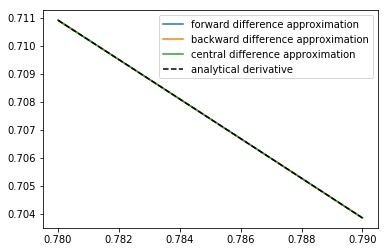

In [8]:
t = np.linspace(0.78,0.79,100)
f = np.sin(t)

dfdt_analytical = np.cos(t)

dfdt_fwd = forward_diff(t, f)
dfdt_bck = backward_diff(t, f)
dfdt_ctr = central_diff(t, f)

plt.plot(t, dfdt_analytical, label='forward difference approximation')
plt.plot(t, dfdt_analytical, label='backward difference approximation')
plt.plot(t, dfdt_analytical, label='central difference approximation')
plt.plot(t, dfdt_analytical, 'k--', label='analytical derivative')
plt.legend();

The solution for a greater t interval:

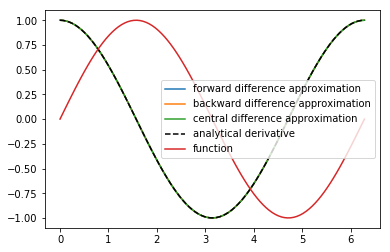

In [9]:
t = np.linspace(0, 2 * np.pi, 100)
f = np.sin(t)

dfdt_analytical = np.cos(t)

dfdt_fwd = forward_diff(t, f)
dfdt_bck = backward_diff(t, f)
dfdt_ctr = central_diff(t, f)

plt.plot(t, dfdt_analytical, label='forward difference approximation')
plt.plot(t, dfdt_analytical, label='backward difference approximation')
plt.plot(t, dfdt_analytical, label='central difference approximation')
plt.plot(t, dfdt_analytical, 'k--', label='analytical derivative')
plt.plot(t, f, label='function')
plt.legend(loc='best');

In computing terms, calculation that use loops are slow.

However, for practical purposes, this is a fast way to approximate the numerical derivative for *smooth* function data.

## Numerical Derivatives by Difference Methods

Some of the functions that we considered in the previous classes we generated by fitting a polynomial curve to empirical (and sometimes noisy) data.

To find the derivative of a polynomial function, we can use the numpy function, `polyder`



Example:
    $$p(x) = x^3 + x^2 + x^1 + 1$$
    
Find $p'(x)$

In [10]:
p = np.poly1d([1,1,1,1])
pd = np.polyder(p)
print(pd)

   2
3 x + 2 x + 1


Find $p'(2)$

In [11]:
pd(2.)

17.0

We can check the solution using the forward/backward/central difference approximation.

Forward difference approximation:

$$ f' \approx \frac{f(x + \Delta x)-f(x)}{\Delta x} $$

let $\Delta x = 0.001$       

In [12]:
pd2 = (p(2. + 0.001) - p(2.)) / 0.001
print(pd2)

17.007000999997857


`polyder` can be be used to solve higher order derivatives by giving a second argument:

In [13]:
# second derivative of p
print(np.polyder(p, 2))

# third derivative of p
print(np.polyder(p, 3))

# fourth derivative of p
print(np.polyder(p, 4))

 
6 x + 2
 
6
 
0


The fourth derivative of a 3rd-order polynomial is zero.

## Piecewise Functions
Occaisionally we need to define piecewise functions e.g.:

$$f(x)=
\begin{cases} 
      0   & ,x < 0 \\
      x   & ,0\leq x \leq 1 \\
      2-x & ,1 < x \leq 2 \\
      x+1 & ,x > 2 
\end{cases}
$$


A simple way to solve this is to use conditional statements.

However, the function is not vectorised (we cannot apply it directly to a data structure).

In [14]:
def f1(x): 
    if x < 0:
        return 0
    elif 0 <= x <= 1:
        return x 
    elif 1 < x <= 2:
        return 2.0 - x 
    else:
         return x + 1.0

print(f1(-1))

# Application to data structure causes an error
# print(f1([0, 1, 2, 3, 4]))

0


You can achieve vectorized behavior (apply the function to each element) by looping through each value in the data structure.

This is not ideal e.g. we cannot directly plot or interrogate the function. 

Ideally we want a function where both of the following statements are allowable:

        print(f1([0, 1, 2, 3, 4]))
        print(f1(0))

In seminar 04_AdvancedFunctions_Libraries.ipynb we learnt to use the numpy function `vectorise` to allow a function to accept both:
- single variables 
- data structures 

as input arguments.



In [15]:
f2 = np.vectorize(f1)
print(f2([0, 1, 2, 3, 4]))
print(f2(0))

[0 1 0 4 5]
0


Dealing with piecewise functions is an example of where vectorising a function is very useful.

The main advantages of vectorization are:
- simplicity of code
- speed

Loops in python are usually very slow compared to vectorized functions.


## Integrating Equations 
A common need in engineering calculations is to __integrate__ an equation over some range to determine the total change. 


For example, find the integral of a function f(x) from a to b i.e.

$$S = \int_{a}^{b} f(x) dx$$


<img src="img/integration.png" alt="Drawing" style="width: 200px;"/>    

This area or interal can be estimated from the sum of trapezoid strips used to represent the curve.

<img src="img/numintegration.png" alt="Drawing" style="width: 200px;"/> 

As a specific example, lets find the integrate:
$$f(x) = x^2$$

with respect to $x$,
<br>within the limits $x=0$ to $x=1$. 

\begin{align*}
S &= \int_{0}^{1} x^2 dx\\
  &= \frac{1}{3}x^3 \biggr\rvert_0^{1}\\
  &= \frac{1}{3}(1)^3 - \frac{1}{3}(0)^3\\
  &= \frac{1}{3}
\end{align*}

The scipy function `quad` is very convenient for solving integration problems:

Input arguments : 
- function to integrate
- lower limit
- upper limit 

In [16]:
from scipy.integrate import quad

In [17]:
# first create a function to describe the integrand
def integrand(x):
    return x**2

ans, err = quad(integrand, 0, 1)

print(ans)
print(f'The estimated error is {err}')

0.33333333333333337
The estimated error is 3.700743415417189e-15


#### Example :  The quantity of water that flows into a tank. 

The change in volumetric flow rate, $v'$, into a tank (with respect to time):

$$ v' =\frac{dv}{dt}=\alpha t $$

where $\alpha = 1\textrm{L/s}$ 

<img src="img/flow_tank.png" alt="Drawing" style="width: 300px;"/> 

__How much liquid flows into the tank over 10 minutes?__
<br>Initial flow rate:
<br>$v_0=5\textrm{L/s,} \qquad t=0$

__Solution__

We can see that at 

\begin{align*}
v_1 &= v_0 + \frac{dv}{dt}\\
    &= v_0 + \alpha (1) \\
\end{align*}

i.e.

$$v_n = v_0 + \alpha n$$


To find the total __volume__ of liquid the enters the tank in $n$ seconds:

$$V = \int_{0}^{n} v_0 + \alpha t \quad dt$$

In [18]:
from scipy.integrate import quad

t0=0.0
tfinal = 10.0
v0=5       # L/s
alpha = 1  # L/s


# create a function to describe the integrand
def integrand(t):
    return v0 + alpha * t

V, err = quad(integrand, t0, tfinal)


print(f'{V} L flowed into the tank in 10 seconds')
print(f'The estimated error is {err}')

100.0 L flowed into the tank in 10 seconds
The estimated error is 1.1102230246251565e-12


We can check the solution:
    
\begin{align*}
V &= \int_{0}^{10} v_0 + \alpha t \quad dt\\
  &= v_0(t) + \frac{1}{2}\alpha t^2 \biggr\rvert_0^{10}\\
  &=100
\end{align*}

### Nested Integrals
Sometimes engineering problems require us to integrate an expression multiple times to find the desired solution.

In that case, we can instead use the function:
- `scipy.integrate.dblquad` : double integral
- `scipy.integrate.tplquad` : triple integral
- `scipy.integrate.nquad`   : any number of intergals

In [19]:
from scipy.integrate import dblquad
from scipy.integrate import tplquad
from scipy.integrate import nquad

__Example:__ Area of a rectangle.
    
<img src="img/area_integrate.png" alt="Drawing" style="width: 300px;"/>     
A very simple application of a nested integral is to find the area, $A$, of a rectangle using the upper and lower x and y limits that define the position of the retangles vertices.

$$ A = \int_{y=c}^{d}\int_{x=a}^{b} \quad dxdy$$

In [20]:
# Some arbitrary values
a, b, c, d = 1, 10, 0, 0.5

f = lambda x, y: 1

# Arguments:
# function, outer integral limits --> inner integral limits
area = dblquad(f, c, d,     # y limits
               lambda x: a, # x limits
               lambda x: b)
print(area)

(4.5, 9.992007221626409e-14)


In [21]:
# Arguments:
# function, inner integral limits --> outer integral limits
area = nquad(f, [[a, b],   # x limits
                 [c, d]])  # y limits
print(area)

(4.5, 9.992007221626409e-14)


##### Triple Integral
$$ A = \int_{z=e}^{f} \int_{y=c}^{d}\int_{x=a}^{b} kxyz\quad dxdy$$

In [22]:
# Some arbitrary values
a, b, c, d, e, f = 0, 1, 2, 3, 1, 2

f = lambda z, y, x, k: k*x*y*z

# Arguments:
# function, outer integral limits --> inner integral limits
a = tplquad(f, 1, 2,                          # z limits  
            lambda x: 2,    lambda x: 3,      # y limits
            lambda x, y: 0, lambda x, y: 1,   # x limits
            args=(3,))
print(a)


(5.625, 9.97393438277222e-14)


We can represent the same problem using `nquad`.

We can nest any number of (`n`) integrals.  

Notice how the syntax of this function is different from `dblquad` and `tplquad`.

In [23]:
# Arguments:
# function, inner integral limits --> outer integral limits

a = nquad(f, [[0, 1],    # x limits 
              [2, 3],    # y limits
              [1, 2]],   # z limits
              args=(3,)) # additional arguments of function f

print(a)

(5.625, 9.97393438277222e-14)


## Symbolic Mathematics
Sometimes we want to express the solution in the form of a symbolic expression (rather than an exact solution).

The `Sympy` package is designed for symbolic mathematics. 

In [24]:
from sympy import solve, symbols, Symbol, Function, Eq, pprint 

### Symbolic Polynomials
To write a symbolic equation, we first create variables to store the symbols we want to use:

In [25]:
a, b, c, x = symbols('a, b, c, x')

We then write an equation, using the variable names.

$$f(x) = ax^2 + bx + c$$

In [26]:
f = a*x**2 + b*x + c

Let's *symbolically* find the roots of the function $f(x)$.

`scipy.solve()` works in the same way as `numpy.linalg.solve()` (07_RootFinding_CoupledEquations.ipynb) but for symbolic mathematics.

In [27]:
solution = solve(f, x)

print(solution)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


This equation takes the familar form of the __quadratic formula__ $$\frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

However, it is difficult to tell from the way it is written.



`scipy.pprint` (pretty print) makes the solution more readable:

In [28]:
pprint(solution)
print(solution)

⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦
[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


We can use `subs` to substitute in numerical values for the symbolic variables in the solution.

In this case, there are two solutions (returned as a list) so we address each index of the list by index:

In [29]:
A, B, C = -1, 2, 3

x0 = solution[0].subs([(a, A), 
                       (b, B), 
                       (c, C)])

x1 = solution[1].subs([(a, A), 
                       (b, B), 
                       (c, C)])

display(x0, x1) 

-1

3

### Symbolic Differentiation
`sympy.diff`
    

In [30]:
from sympy import diff

Using the same functionas the previous example:
    $$f(x) = ax^2 + bx + c$$

In [31]:
f = a*x**2 + b*x + c

$f'(x)$ <br>(first derivative w.r.t $x$)

In [32]:
print(diff(f, x))

2*a*x + b


$f''(x)$ <br>(second derivative w.r.t $x$)

In [33]:
print(diff(f, x, 2))

2*a


$f'(a)$ <br>(first derivative w.r.t $a$)

In [34]:
print(diff(f, a))

x**2


We can substitute numerical values into the solution:

Find $f'(a), \quad x=2$

In [35]:
diff(f, a).subs([(x, np.pi/2)])

2.46740110027234

### Symbolic Integration
`sympy.integrate`

In [36]:
from sympy import integrate

Using the same functionas the previous example:
    $$f(x) = ax^2 + bx + c$$

In [66]:
f = a*x**2 + b*x + c

Find the general solution to<br>$ \int f(x)  dx$

In [67]:
print(integrate(f, x))

a*x**3/3 + b*x**2/2 + c*x


Find the definite integral<br>$\int_{x=0}^{1} f(x)dx$

In [68]:
print(integrate(f, (x, 0, 1))) # definite integral from x=0..1

a/3 + b/2 + c


Find the integral shown where constants $a,b,c$ gievn as numerical values
<br>$\int_{x=0}^{1} f(x)dx$
<br>$a=b=c=2 $

In [69]:
integrate(f, (x, 0, 1)).subs([(a, 2), 
                              (b, 2), 
                              (c, 2)])

11/3

### Differentiating a Symbolic Function
We can also symbolically represent:
- a function.
- a *single* symbol using `Symbol()`.
<br>*Notice how this differs from `symbols` for creating multiple symbols.*

In [41]:
from sympy import Function, Symbol
f = Function('f')
x = Symbol('x')

The syntax for differentiation of a *symbolic function* is also different from the syntax for a function comprised of *symbolic variables*. 

In [42]:
fd = f(x).diff(x)

pprint(fd)

d       
──(f(x))
dx      


## Ordinary Differential Equations
__Ordinary differential equation__
<br>A differential equation containing one or more functions of one independent variable and its derivatives. 

Sometimes you want to solve a problem of the form:

*Given an equation containing the derivatives of the function $f(x)$, find $f(x)$.*

### Symbolic Analytical Solution to ODE
The function `sympy.dsolve` can be used to find the solution to any ordinary differential equation.

In [43]:
from sympy import dsolve, Eq, sin, cos

Syntax to represent $f'(x)$
        
        f(x).diff(x)
        
Syntax to represent $f''(x)$
        
        f(x).diff(x, x)

In the next examples we will:
- solve ODE symbolically to find the general solution, $f(x)$
- substitute an initial condition to find constants of the general solution
- find the value of the function for a specific input variable.

#### Solving a First Order ODE

Let's start with an example we used earlier: 

$$f'(x) = cos(x), \quad f(x) = sin(x)$$

We create a variable to represent:
- the function $f(x)$
- the input variable $x$

In [44]:
f = Function('f')
x = Symbol('x')


We create a Sympy `Eq` equation.

The first argument (left hand side of equation) is equal to the second argument (right hand side of equation).

In [45]:
ode = Eq(f(x).diff(x), cos(x))


We find the general solution, with unknown constant, `C1`:

In [46]:
# General solution
gen_sol = dsolve(ode, f(x))

pprint(gen_sol)


f(x) = C₁ + sin(x)


The package `display` can also be used to achieve more readable print formatting for mathematical equations:

In [70]:
from IPython.display import display

In [71]:
display(gen_sol)

Eq(f(x), C1 + C2*x + x**4)

Use an initial value, $x=0, \quad f(x)=0$ to find `C1`.

`subs` takes a list og the substitutions we want to make as arguments.

In [49]:
# Method 1
cnd = gen_sol.subs([(x,0),       # x = 0
                    (f(0), 0)])  # f(0) = 0


# which can also be written: 
# Method 2
# cnd = Eq(gen_sol.rhs.subs(x, 0), 0) # x = 0, f(0) = 0

display(cnd)

Eq(0, C1)

Substitute `C1` into the general solution, noting if `C1` appears on left or right of equation

In [50]:
# Method 1, C1 rhs
ode_sol = gen_sol.subs([(cnd.rhs, cnd.lhs)])

# Method 2, C1 lhs
# ode_sol = gen_sol.subs([(cnd.lhs, cnd.rhs)])

display (ode_sol) 

Eq(f(x), sin(x))

##### What does this code do?

>`ode_sol = A_sol.subs([(cnd.rhs, cnd.lhs)])`

`cnd` is a Sympy __`Eq`__ (equation) object.

The first argument (left hand side of equation) is equal to the second argument (right hand side of equation).

In [51]:
print(cnd)

Eq(0, C1)


This means we can conveniently access the left and right hand using `lhs` and `rhs`.

The expression on the right hand side of `const` is replaced by the expression on the left hand side of `const` wherever it appears in the general solution.

We can use `subs` again to find the value of $f(x)$ at any input value $x$.

In [52]:
spec_sol = ode_sol.subs([(x, np.pi/2)])
display(spec_sol) 

Eq(f(1.5707963267949), 1.00000000000000)

Lastly, we convert the symbolic representation to a numerical value using the method `evalf`.

In [53]:
display(spec_sol.evalf()) 

Eq(f(1.5707963267949), 1.00000000000000)

#### Solving a Second Order ODE 
Taking another expression containing higher order derivatives, 
<br>we can write the equation:

$$A=f''(x) =12x^2$$    

In [77]:
f = Function('f')
x = Symbol('x')

A = Eq(f(x).diff(x, x), 12*x**2)

The highest order differential is a second order differential.

The general solution will have two constantsto solve.

In [78]:
# General solution
gen_sol = dsolve(A, f(x))
display(gen_sol)

Eq(f(x), C1 + C2*x + x**4)

Find the constants by substitution.

$f(0)=0$

$f(1)=3$

$f'(1)=6$


In [83]:
cnd0 = Eq(gen_sol.rhs.subs(x, 0), 0)           # f(0) = 0

cnd1 = Eq(gen_sol.rhs.subs(x, 1), 3)           # f(1) = 3

# cnd1 = Eq(gen_sol.rhs.diff(x).subs(x, 1), 6)  # f'(1) = 6

display(cnd0, cnd1)

Eq(C1, 0)

Eq(C1 + C2 + 1, 3)

Create symbolic representations of the variables.

This time we use `sympy.solve` to solve the coupled equations `cnd0` and `cnd1` for constants `C1, C2`:

In [84]:
C1, C2 = symbols("C1, C2")  # generic constants

C1C2_sol = solve([cnd0, cnd1], (C1, C2))
display(C1C2_sol)

{C1: 0, C2: 2}

Substitute the two constants into the general solution.

In [82]:
ode2_sol = gen_sol.subs(C1C2_sol)
display(ode2_sol)

Eq(f(x), x**4 + 2*x)

## Numerial Solutions to  Ordinary Differential Equations

The function `scipy.integrate.odeint` solves first order differential equations.

In contrast to `dsolve`, this gives the numerical solution for a range of input values, rather than the symbolic expression.

We will cover this function in greater depth in the next class.

In [59]:
from scipy.integrate import odeint

The function `odeint` takes a user-defined function as an argument.

This input function should define the derivative you want to solve in the form: 

$f' = \frac{df}{dt} = g(t)$

For example:

$f' = cos(t), \quad f(t=0)=0$

In [60]:
def dfdt(x, t):
    return np.cos(t)

Two additional arguments are needed:
- the value(s) of t at which to evaluate x, starting with the initial value
- the initial value of x
- (if `dx_dt` takes any other argumemts they are entered as a tuple as the third argument)

In [61]:
ts = np.linspace(0,5,100) # the value(s) of t at which to evaluate x
f0 = 0                    # the initial value

# odeint returns x at each value of t
fs = odeint(dfdt, # function
            f0,   # initial value
            ts)   # time span


The function `odeint` returns an $n\times 1$ array (2D column).

To plot the output we have to "flatten" it to a 1D array.

Recall, $f' = cos(t), \quad f = sin(t)$

In [85]:
fs = np.array(fs).flatten()

Plot the function

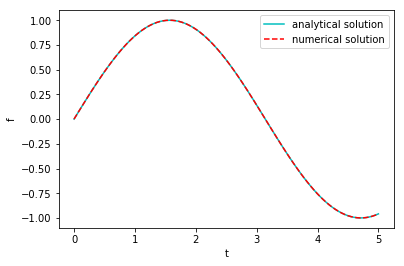

In [86]:
plt.xlabel("t")
plt.ylabel("f")
plt.plot(ts, np.sin(ts), 'c', label='analytical solution');
plt.plot(ts, fs, 'r--', label='numerical solution');
plt.legend(loc='best')

The numerical and analytical solutions agree.

Lastly we can add the sybolically derived function:

In [87]:
sym_sol = []

for t in ts:
    sym_sol.append(ode_sol.subs([(x, t)]).evalf().rhs)

Plot the function  

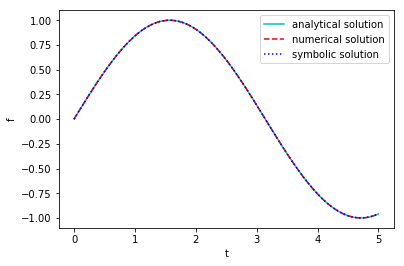

In [89]:
plt.xlabel("t")
plt.ylabel("f")
plt.plot(ts, np.sin(ts), 'c', label='analytical solution');
plt.plot(ts, fs, 'r--', label='numerical solution');
plt.plot(ts, fs, 'b:', label='symbolic solution');
plt.legend(loc='best')

All solutions agree:

<a id='TestYourselfExercises'></a>
# Test-Yourself Exercises

Compete the Test-Youself exercises below.

Save your answers as .py files and email them to:
<br>philamore.hemma.5s@kyoto-u.ac.jp

### Test Yourself-Exercise : Root Finding

Find the roots of the function.

i.e. find all $x$ where $f(x)=0$

$$f(x)= ax^3 - bx^2 - ax + b$$

Use the values $a=3, b=1$ to find the exact vaue of the roots.

### Test Yourself-Exercise : Car Breaking

During braking a car’s velocity is given by:

$$v = v_{0} e^{−t/\tau}$$

$v_{0}=15$ m/s

$\tau = 2$ s

Find the distance travelled during the 10s after the breaks are applied.